In [ ]:

from tensorflow.keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import sys
import random

np.set_printoptions(threshold=sys.maxsize)

In [ ]:
!pip install --upgrade -q kaggle

!mkdir /root/.kaggle
import json
token = {
    "username": "zahidhussain909",
    "key": "39a06efd89d0f2a699143b8d3d62b216"
}

with open('/root/.kaggle/kaggle.json', 'w') as config_file:
    json.dump(token, config_file)
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d zahidhussain909/retina-segmentation-saved-model

!kaggle datasets download -d zahidhussain909/denoised-oct

import zipfile
zipref=zipfile.ZipFile("/content/retina-segmentation-saved-model.zip",'r')
zipref.extractall()
zipref.close()

import zipfile
zipref=zipfile.ZipFile("/content/denoised.zip",'r')
zipref.extractall()
zipref.close()

!rm -rf /content/retina-segmentation-saved-model.zip
!rm -rf /content/denoised.zip

 43% 9.00M/21.0M [00:00<00:00, 44.5MB/s]
100% 21.0M/21.0M [00:00<00:00, 81.7MB/s]
100% 10.8G/10.8G [01:25<00:00, 208MB/s]
100% 10.8G/10.8G [01:26<00:00, 135MB/s]


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/retina_segmentation_8_layer (1).hdf5')

OSError: ignored

In [ ]:

test_test = []

SIZE_X = 640
SIZE_Y = 640
n_classes= 9 

test_path = "/content/OCT2017 /train/NORMAL"


for directory_path in glob.glob(test_path):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, 0)       
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        test_test.append(img) 
        if len(test_test) > 100:
            break
        else:
            pass

    
test_test = np.array(test_test)

test_test = np.expand_dims(test_test, axis=3)
test_test = normalize(test_test, axis=1)

In [ ]:
test_test.shape

(101, 640, 640, 1)

1/1 [==============================] - 1s 933ms/step


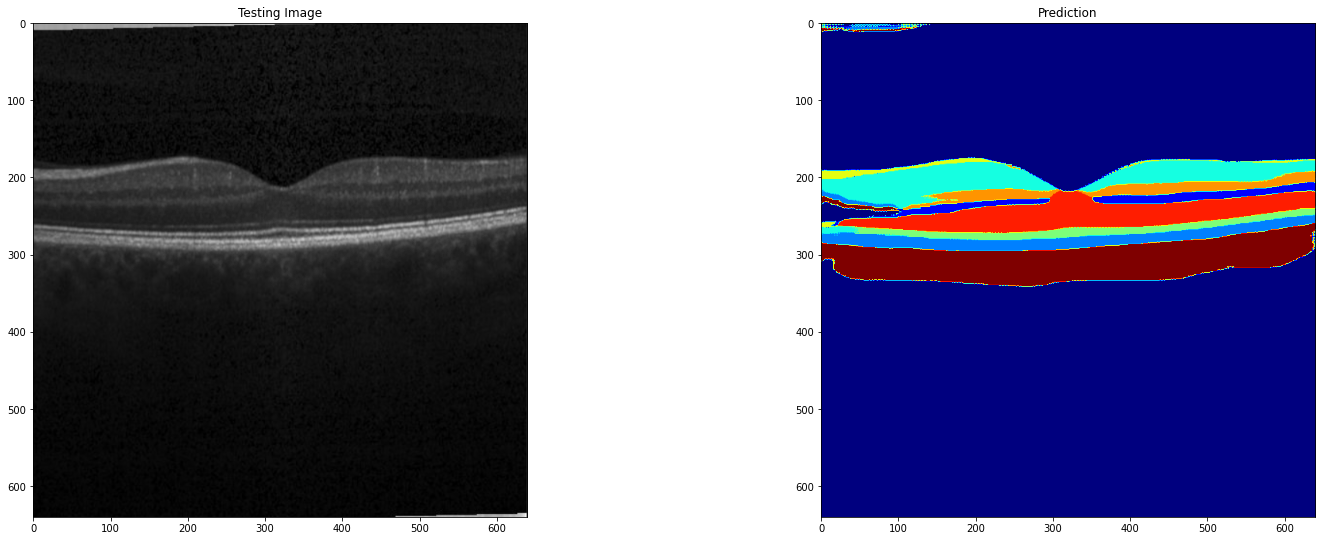

In [ ]:
test1 = test_test[50]
test_img_norm=test1[:,:,0][:,:,None]
test=np.expand_dims(test_img_norm, 0)

prediction = (model.predict(test))
predicted_img = np.argmax(prediction, axis=3)[0,:,:]

plt.figure(figsize=(40, 20))

plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test1[:,:,0],cmap='gray')

plt.subplot(232)
plt.title('Prediction')
# plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.imshow(predicted_img, cmap='jet')

# plt.imshow(prediction[0,:,:,7], cmap='jet')


In [ ]:
prediction.shape

(1, 640, 640, 9)

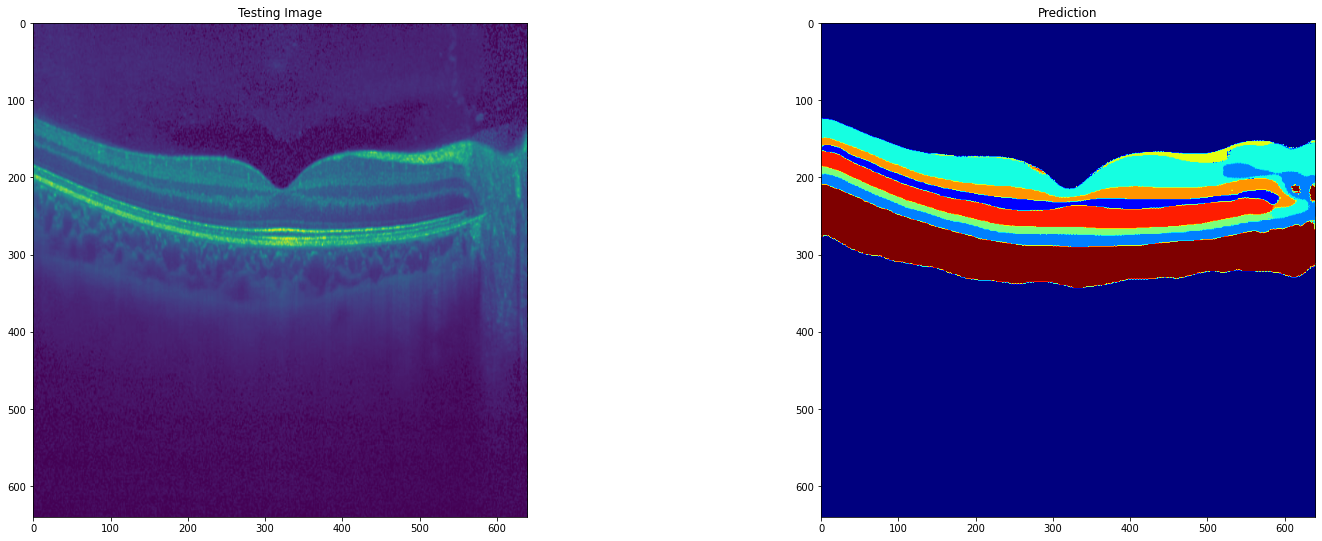

In [ ]:
test1 = test_test[20]
test_img_norm=test1[:,:,0][:,:,None]
test=np.expand_dims(test_img_norm, 0)

prediction = (model.predict(test))
predicted_img = np.argmax(prediction, axis=3)[0,:,:]

plt.figure(figsize=(40, 20))

plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test1[:,:,0])

plt.subplot(232)
plt.title('Prediction')
# plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.imshow(predicted_img, cmap='jet')

# plt.imshow(prediction[0,:,:,7], cmap='jet')
